In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# lower_date_section = np.array([90, 50, 50])
# upper_date_section = np.array([130, 255, 255])

# lower_kitchen_porters_section = np.array([30, 20, 80])
# upper_kitchen_porters_section = np.array([60, 100, 255])

# preprocess_image

# detect_table_structure

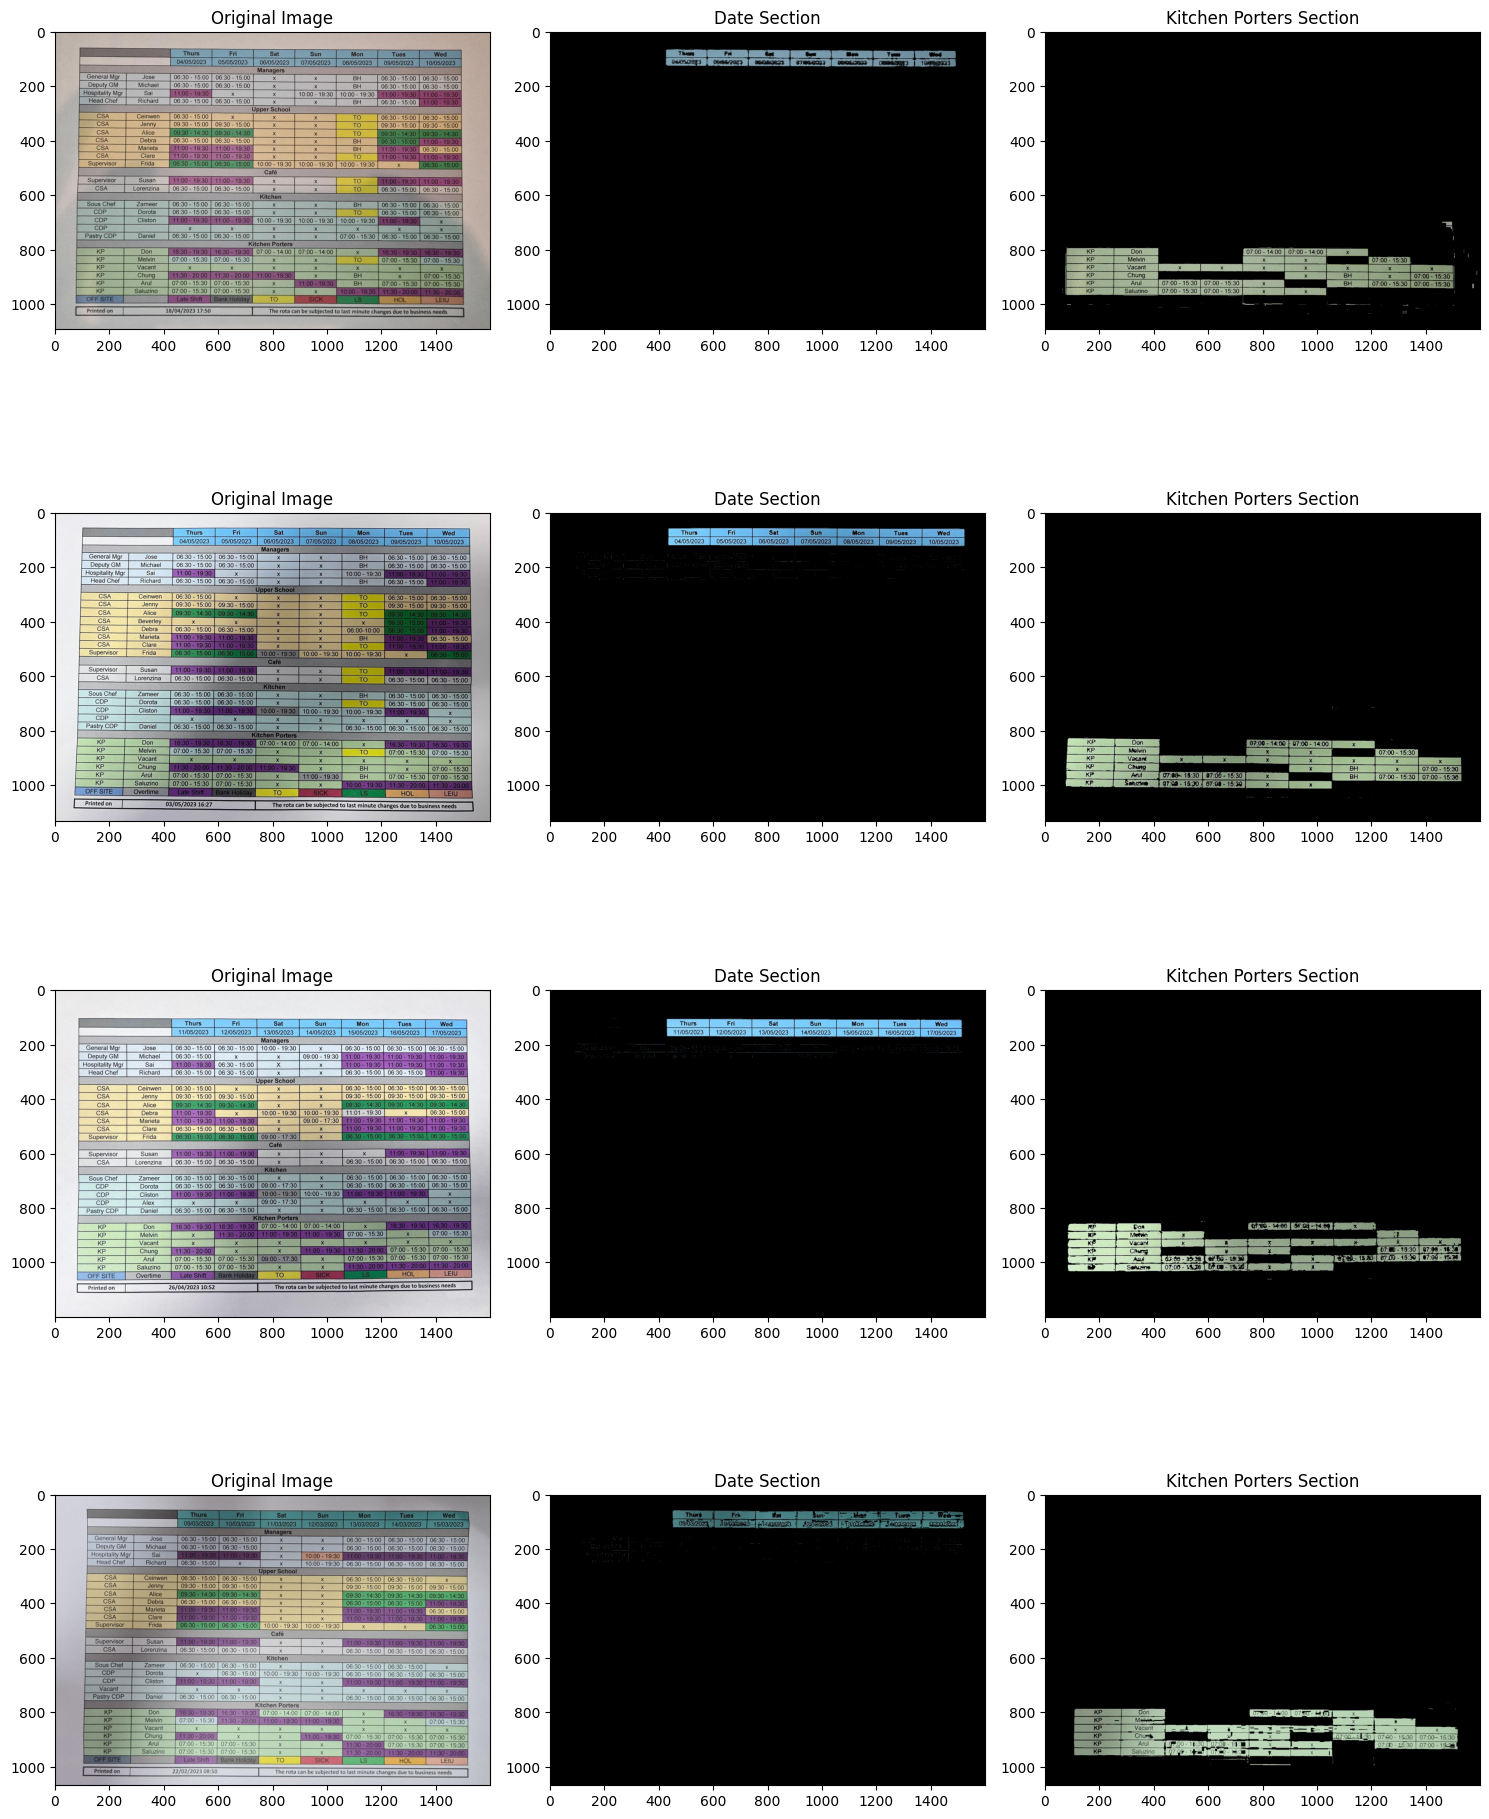

In [3]:
import cv2
import pytesseract
from pytesseract import Output
from matplotlib import pyplot as plt

def create_color_mask(hsv_img, lower_color, upper_color):
    return cv2.inRange(hsv_img, lower_color, upper_color)

def apply_color_mask(img, mask):
    return cv2.bitwise_and(img, img, mask=mask)

def extract_text_from_region(region):
    return pytesseract.image_to_string(region, config='--psm 6')

def find_date_and_kitchen_porters_sections(image_path):
    img = cv2.imread(image_path)
    
    if img is None:
        print(f"Error: Cannot read image file '{image_path}'.")
        return None, None, None, None

    hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # Define the color ranges
    lower_date_section = np.array([90, 50, 50])
    upper_date_section = np.array([130, 255, 255])
    
    lower_kitchen_porters_section = np.array([30, 10, 80])
    upper_kitchen_porters_section = np.array([60, 100, 255])

    # Create search area masks
    date_search_area = np.zeros_like(hsv_img[:, :, 0])
    date_search_area[1:250, :] = 1

    kitchen_porters_search_area = np.zeros_like(hsv_img[:, :, 0])
    kitchen_porters_search_area[700:, :] = 1

    # Create masks for each color range
    date_mask = create_color_mask(hsv_img, lower_date_section, upper_date_section)
    kitchen_porters_mask = create_color_mask(hsv_img, lower_kitchen_porters_section, upper_kitchen_porters_section)

    # Apply search area masks to color masks
    date_mask = cv2.bitwise_and(date_mask, date_mask, mask=date_search_area)
    kitchen_porters_mask = cv2.bitwise_and(kitchen_porters_mask, kitchen_porters_mask, mask=kitchen_porters_search_area)

    # Apply the masks to the original image
    date_section = apply_color_mask(img, date_mask)
    kitchen_porters_section = apply_color_mask(img, kitchen_porters_mask)

    # # Extract text from the filtered regions
    # date_section_text = extract_text_from_region(date_section)
    # kitchen_porters_section_text = extract_text_from_region(kitchen_porters_section)

    return date_section, kitchen_porters_section 




def process_and_display_images(image_paths):
    num_images = len(image_paths)
    fig, axes = plt.subplots(num_images, 3, figsize=(15, 5 * num_images))
    
    for i, image_path in enumerate(image_paths):
        date_section, kitchen_porters_section = find_date_and_kitchen_porters_sections(image_path)

        if date_section is None:
            print(f"Skipping image {i + 1}: {image_path}")
            continue

        # Visualize the filtered regions (optional)
        axes[i, 0].imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
        axes[i, 0].set_title("Original Image")
        
        axes[i, 1].imshow(cv2.cvtColor(date_section, cv2.COLOR_BGR2RGB))
        axes[i, 1].set_title("Date Section")
        
        axes[i, 2].imshow(cv2.cvtColor(kitchen_porters_section, cv2.COLOR_BGR2RGB))
        axes[i, 2].set_title("Kitchen Porters Section")


    plt.tight_layout()
    plt.show()
    
image_paths = ['table_image.jpeg', 'table_image2.jpeg', 'table_image3.jpeg','table_image4.jpeg']
process_and_display_images(image_paths)



In [4]:
def crop_selected_area(img, mask, margin_percentage=2):
    # Perform morphological operations to expand the detected area
    kernel = np.ones((5, 5), np.uint8)
    dilation = cv2.dilate(mask, kernel, iterations=1)

    contours, _ = cv2.findContours(dilation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # If no contours are found, return None
    if not contours:
        return None

    # Find the largest contour (assumes it's the desired area)
    largest_contour = max(contours, key=cv2.contourArea)

    # Find the bounding rectangle of the largest contour
    x, y, w, h = cv2.boundingRect(largest_contour)

    # Add margin
    img_height, img_width, _ = img.shape
    margin_x = int(w * margin_percentage / 100)
    margin_y = int(h * margin_percentage / 100)

    x = max(x - margin_x, 0)
    y = max(y - margin_y, 0)
    w = min(w + 2 * margin_x, img_width - x)
    h = min(h + 2 * margin_y, img_height - y)

    # Crop the image
    cropped_img = img[y:y + h, x:x + w]

    return cropped_img


In [5]:
def find_date_and_kitchen_porters_sections(image_path):
    img = cv2.imread(image_path)
    
    if img is None:
        print(f"Error: Cannot read image file '{image_path}'.")
        return None, None, None, None

    hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # Define the color ranges
    lower_date_section = np.array([90, 50, 50])
    upper_date_section = np.array([120, 255, 255])

    
    lower_kitchen_porters_section = np.array([30, 10, 80])
    upper_kitchen_porters_section = np.array([60, 100, 255])

    # Create search area masks
    date_search_area = np.zeros_like(hsv_img[:, :, 0])
    date_search_area[1:250, :] = 1

    kitchen_porters_search_area = np.zeros_like(hsv_img[:, :, 0])
    kitchen_porters_search_area[700:, :] = 1

    # Create masks for each color range
    date_mask = create_color_mask(hsv_img, lower_date_section, upper_date_section)
    kitchen_porters_mask = create_color_mask(hsv_img, lower_kitchen_porters_section, upper_kitchen_porters_section)

    # Apply search area masks to color masks
    date_mask = cv2.bitwise_and(date_mask, date_mask, mask=date_search_area)
    kitchen_porters_mask = cv2.bitwise_and(kitchen_porters_mask, kitchen_porters_mask, mask=kitchen_porters_search_area)

    # Apply the masks to the original image
    date_section = apply_color_mask(img, date_mask)
    kitchen_porters_section = apply_color_mask(img, kitchen_porters_mask)

    # Crop the selected areas
    cropped_date_section = crop_selected_area(img, date_mask)
    cropped_kitchen_porters_section = crop_selected_area(img, kitchen_porters_mask)


    return cropped_date_section, cropped_kitchen_porters_section

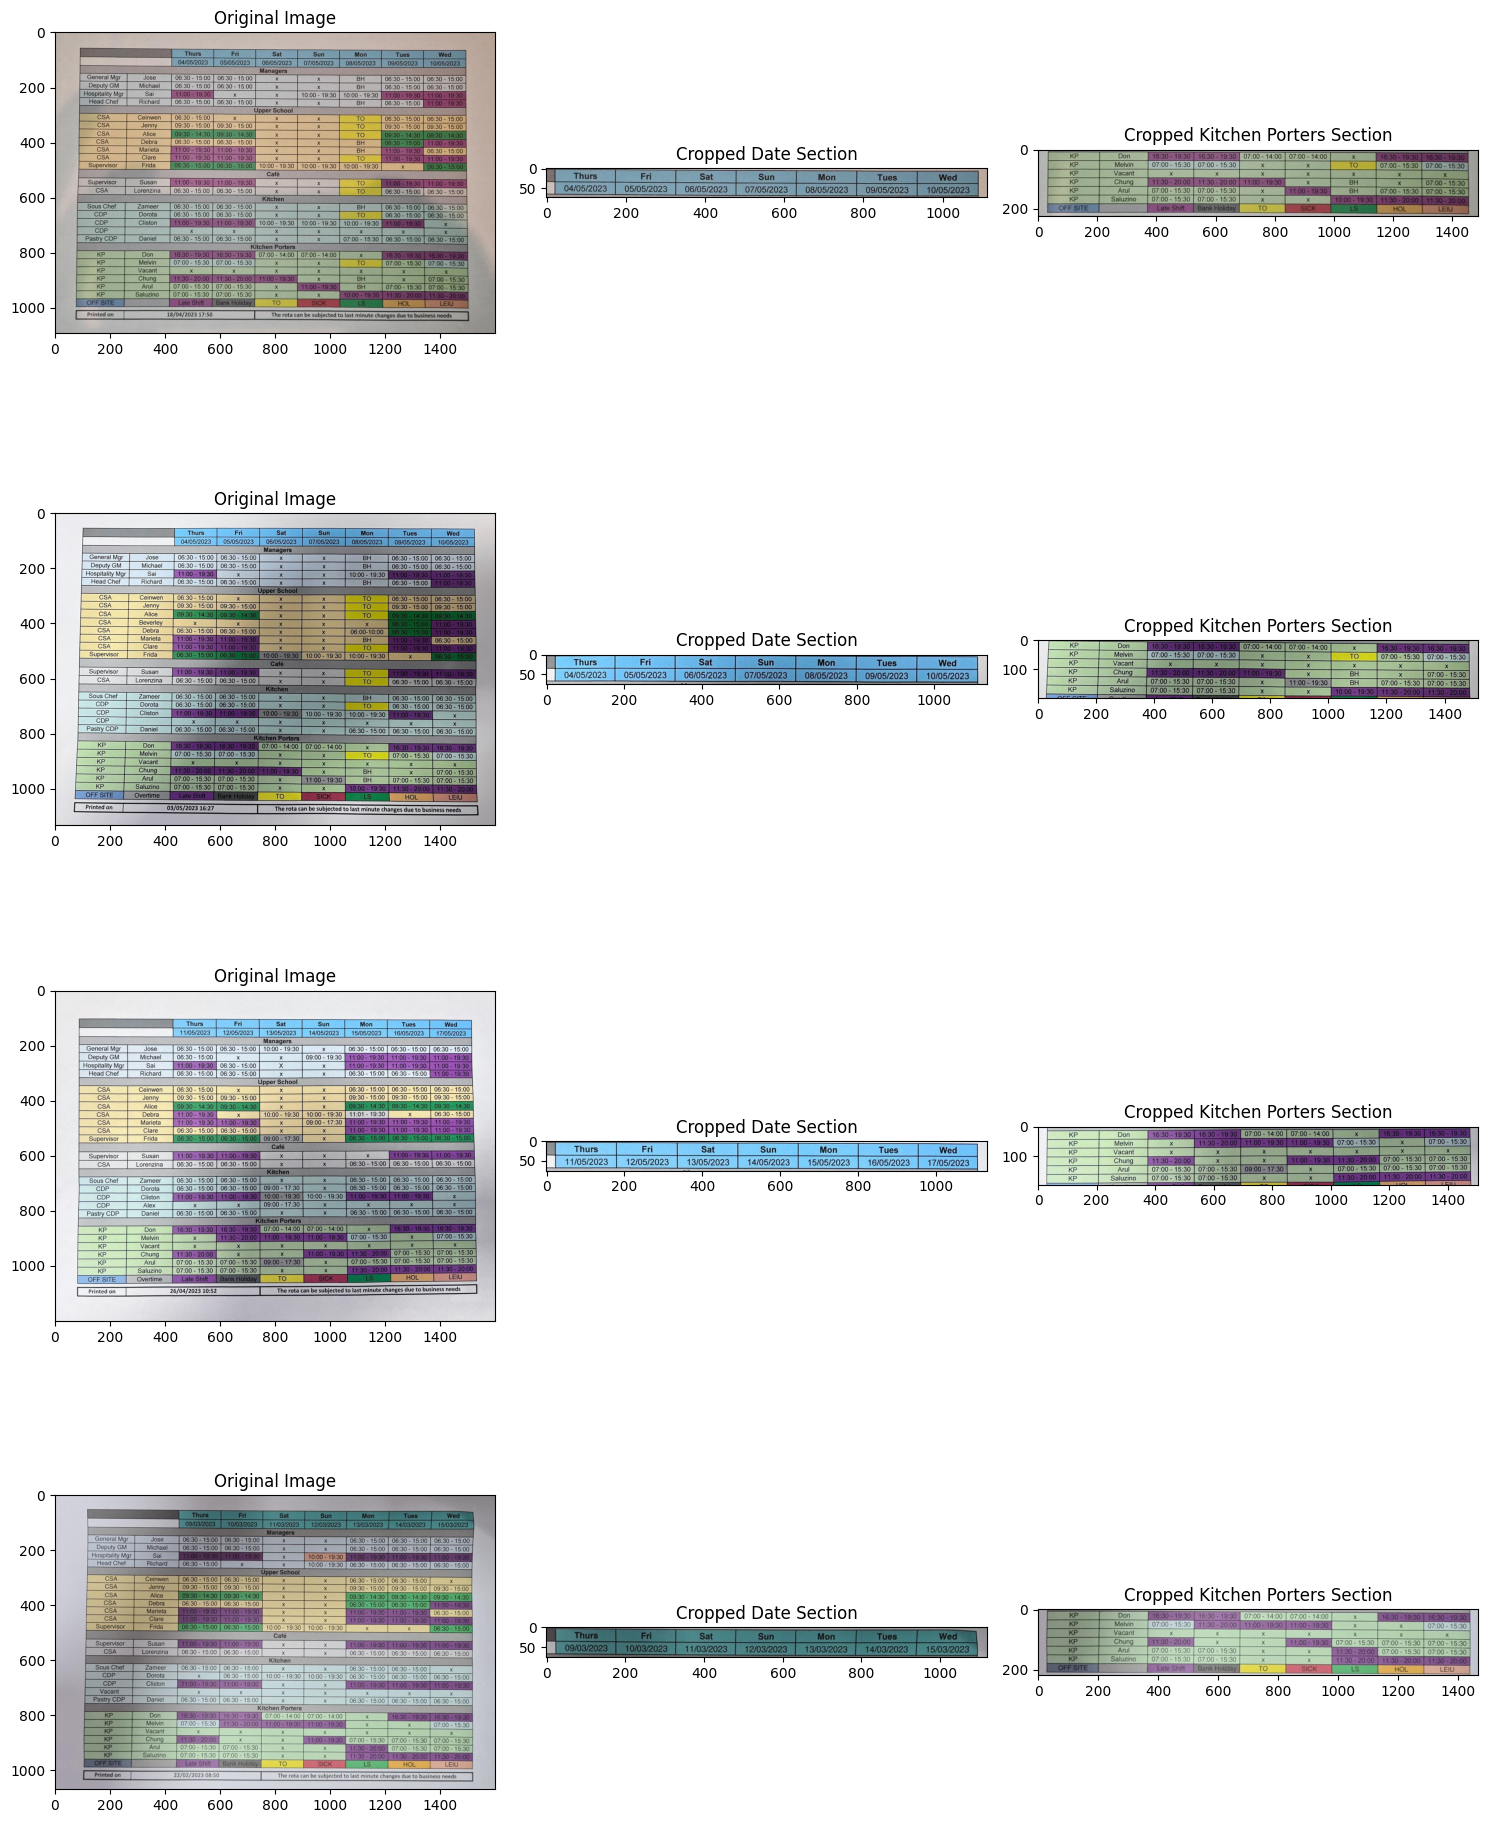

In [6]:
def process_and_display_images(image_paths):
    num_images = len(image_paths)
    fig, axes = plt.subplots(num_images, 3, figsize=(15, 5 * num_images))
    
    for i, image_path in enumerate(image_paths):
        cropped_date_section, cropped_kitchen_porters_section = find_date_and_kitchen_porters_sections(image_path)

        if cropped_date_section is None or cropped_kitchen_porters_section is None:
            print(f"Skipping image {i + 1}: {image_path}")
            continue

        # Visualize the filtered regions (optional)
        axes[i, 0].imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
        axes[i, 0].set_title("Original Image")
        
        axes[i, 1].imshow(cv2.cvtColor(cropped_date_section, cv2.COLOR_BGR2RGB))
        axes[i, 1].set_title("Cropped Date Section")
        
        axes[i, 2].imshow(cv2.cvtColor(cropped_kitchen_porters_section, cv2.COLOR_BGR2RGB))
        axes[i, 2].set_title("Cropped Kitchen Porters Section")

    plt.tight_layout()
    plt.show()

image_paths = ['table_image.jpeg', 'table_image2.jpeg', 'table_image3.jpeg', 'table_image4.jpeg']
process_and_display_images(image_paths)


In [13]:
def preprocess_image(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    resized = cv2.resize(gray, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
    blurred = cv2.GaussianBlur(resized, (5, 5), 0)
    thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
    return thresh

def extract_and_process_text(cropped_date_section, cropped_kitchen_porters_section):
    preprocessed_date_section = preprocess_image(cropped_date_section)
    preprocessed_kitchen_porters_section = preprocess_image(cropped_kitchen_porters_section)

    date_section_text = pytesseract.image_to_string(preprocessed_date_section, config='--psm 6')
    kitchen_porters_section_text = pytesseract.image_to_string(preprocessed_kitchen_porters_section, config='--psm 6')

    # Process the extracted text to extract specific information like dates, names, and times.
    # You can use regular expressions or string manipulation techniques in Python.

    return date_section_text, kitchen_porters_section_text


# Usage:
image_paths = ['table_image.jpeg', 'table_image2.jpeg', 'table_image3.jpeg', 'table_image4.jpeg']

for image_path in image_paths:
    cropped_date_section, cropped_kitchen_porters_section = find_date_and_kitchen_porters_sections(image_path)
    date_section_text, kitchen_porters_section_text = extract_and_process_text(cropped_date_section, cropped_kitchen_porters_section)

    print(f"Image: {image_path}")
    print("Date section text:")
    print(date_section_text)
    print("Kitchen porters section text:")
    print(kitchen_porters_section_text)
    print("--------------")


Image: table_image.jpeg
Date section text:
if 104105/2023;.|t 06/05/2023" |: 06/05/2028 |i: 07/05/2028..|, 08/05/2023" | 09/05/2023": | No/05/2023" |

Kitchen porters section text:
2 HD
7 oe
oY a
ve ae
e cE
a &
i oe

--------------
Image: table_image2.jpeg
Date section text:
~[ 0410572033" |, °05/08/2028. | (06I05/2023'. | (67/05/2028. |" (08/05/2025- |" oal0s/2023 -| 10/05/3005 .|

Kitchen porters section text:
SS nn EE EEE SE NE ee EN DO ES st
|
ee EER lh Melvin 607200. 15:80 | 070051590, ka, nO. _Ron00e4§:30'|. 07-00-1530 |
(KR Wacant fies es oo LR Re ee CAL ee all
| KR ehung). | 14:30-~20:00:| 11:30 20:00 | 11:00 - 19:80; fis RE see. Ge BE. en ox 07002 15:80]
PEARCE Zo [Es sSallizing: - [0 7/00215:30; S07: 00% 15:80) [% xe ee ems e885, al 10:00=19:30|: 11:30= 20:00.| 44:30 20°00 |

PET as re ey pepe pet Pe eo betel big eh iciie ates ny ve ens home ee ee —— SS srereEreeeres=ate a Se cereEEEEEEETrE Gummer mee merit en

--------------
Image: table_image3.jpeg
Date section text:

Kitch